This notebook shows how the silhouette score decreases as we increase the number of clusters, and as we smooth out the closing price data with a rolling average

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def get_rolling_average(dataframe,nodays):
    dfnew = dataframe.copy()
    cols = dfnew.columns
    for c in cols:
        dfnew[c]=dfnew[c].rolling(nodays,center=True).mean()
    dfnew = dfnew.dropna(axis='rows')
    return dfnew

In [3]:
def prices_to_perc_change(prices):
    return [100*(prices[i+1]-prices[i])/prices[i] for i in range(len(prices)-1)]

def convert_to_perc(dataframe):
    return pd.DataFrame({t:prices_to_perc_change(closing_prices[t]) for t in closing_prices.columns})

There may be external factors that force all prices to change more than they normally would on certain days; we can eliminate that variation by normalizing the rows wrt to the L1 norm.

In [4]:
def l1_row_normalization(dataframe):
    dft = dataframe.T.copy()
    maxpercchanges = {i:max((dft[i].apply(abs)).values) for i in dft.columns}
    for i in dft.columns:
        dft[i] = dft[i]/maxpercchanges[i]
    return dft.T

def convert_perc_normalized(dataframe):
    return l1_row_normalization(convert_to_perc(dataframe))

In [5]:
def l2_normalization(dataframe):
    dfn = dataframe.copy()
    for ticker in dfn:
        dfn[ticker] = dfn[ticker]/np.linalg.norm(dfn[ticker])
    return dfn

def normalize_transpose(dataframe):
    return l2_normalization(dataframe).T

In [11]:
closing_prices = pd.read_pickle("./data/stocks/closing_prices.pkl")

dfs = [normalize_transpose(get_rolling_average(closing_prices,d)) for d in [3,5,7]]
silhouette_scores = [[] for d in [3,5,7]]
noclusters = [i for i in range(3,61)]
for i in noclusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    for j in [0,1,2]:
        df = dfs[j]
        ypred = kmeans.fit(df)
        labels = kmeans.labels_
        score = metrics.silhouette_score(df, labels, metric = 'euclidean')
        silhouette_scores[j].append(score)


C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 1 2 2 1 0 1 2 0 2 0 1 2 1 2 0 0 1 2 2 0 1 2 1 0 1 2 2 0 2 2 0 2 2 2 2 2
 2 1 2 2 1 1 2 1 1 1 1 0 2 2 2 2 2 2 1 2 0 0 0 2 0 2 0 2 2 2 1 2 2 1 2 2 1
 0 1 1 1 2 2 1 2 2 0 2 1 1 1 1 0 1 1 2 2 1 1 0 2 2 0 0 0 1 2 1 2 1 2 2 1 1
 2 0 2 1 2 2 1 2 1 0 0 2 2 2 1 2 1 2 0 2 1 2 0 2 2 0 1 2 2 1 2 1 2 0 2 2 1
 2 0 0 0 0 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 0 2 2 0 1 2 1 2 2 0 0 2 2 0 2 2
 2 0 2 2 2 1 1 2 1 0 2 2 0 1 1 0 2 1 1 2 2 2 2 1 2 0 2 2 1 2 2 0 2 2 1 2 2
 2 1 2 0 2 2 2 2 2 2 2 2 0 2 1 2 1 2 0 2 2 2 2 2 0 0 1 0 1 2 0 2 2 1 1 0 2
 2 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 0 2 1 2 2 2 1 1 1 2 2 2 2 1 2 0 2 1
 0 1 1 1 1 1 2 2 2 1 2 2 1 0 0 2 2 1 1 2 0 2 2 1 2 1 2 1 2 0 2 2 0 1 1 0 1
 1 0 2 2 2 0 0 2 1 2 2 1 1 1 1 2 1 2 1 2 1 2 1 1 1 0 1 2 2 0 1 2 0 2 2 2 2
 2 0 2 2 2 0 2 2 2 2 2 1 2 1 2 1 2 2 2 2 0 2 2 2 0 1 0 0 2 1 2 1 2 1 2 1 0
 2 1 0 2 1 1 2 2 2 1 0 2 0 1 2 0 2 1 1 2 1 2 2 2 1 2 1 0 2 2 2 2 1 2 2 2 1
 2 1 1 2 2 0 1 0 0 2 2 2 2 2 1 2 2 2 2 2 1 2 1 0 2 2 2 1 2 0 1 2 2 0 2 2 1
 1 1 2 2 2 2 2 1 2 2 2 2 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 2 1 1 2 1 2 1 0 1 0 2 1 2 1 0 0 2 1 1 0 2 1 2 0 2 1 1 1 1 1 0 1 1 1 1 1
 1 2 1 1 2 2 1 2 2 2 2 0 1 1 1 1 1 1 2 1 0 0 0 1 0 1 0 1 1 1 2 1 1 2 1 1 2
 0 2 2 2 2 1 2 1 1 0 1 2 2 2 2 0 2 2 1 1 2 2 0 1 1 0 0 0 2 1 2 1 2 1 1 2 2
 1 0 1 2 1 1 2 1 2 0 0 1 1 1 2 1 2 1 0 1 2 1 0 1 1 0 2 1 1 2 1 2 1 0 1 1 2
 1 0 0 0 0 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 0 1 1 0 2 1 2 1 1 0 0 1 1 0 1 1
 1 0 1 1 1 2 2 1 2 0 1 1 0 2 2 0 1 2 2 1 1 1 1 2 1 0 1 1 2 1 1 1 1 1 2 1 1
 1 2 1 0 1 1 1 1 1 1 1 1 0 1 2 1 2 1 0 1 1 1 1 1 0 0 2 0 2 1 0 1 1 2 2 0 1
 1 2 1 1 1 1 1 2 1 1 1 0 0 1 1 1 2 1 1 0 1 2 1 1 1 2 2 2 1 1 1 1 2 1 0 1 2
 0 2 2 2 2 2 1 1 1 2 1 1 2 0 0 1 1 2 2 1 0 1 1 2 1 2 1 2 1 0 1 1 0 2 2 0 2
 2 0 1 1 1 0 0 1 2 1 1 2 2 2 2 1 2 1 2 1 2 1 2 2 2 0 2 1 1 0 2 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 2 1 2 1 2 1 1 1 1 0 1 1 1 0 2 0 0 1 2 1 2 1 2 2 2 0
 1 2 0 1 2 2 1 1 1 2 0 1 0 2 1 0 1 2 2 1 2 1 1 1 2 1 2 0 1 1 1 1 2 1 1 1 2
 1 2 2 1 1 0 2 0 0 1 1 1 1 1 2 1 1 1 1 1 2 1 2 0 1 1 1 2 1 0 2 1 1 0 1 1 2
 2 2 1 1 1 1 1 2 1 1 1 1 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2 1 0 0 1 0 1 0 2 0 2 1 0 1 0 2 2 1 0 0 2 1 0 1 2 1 0 0 2 0 0 2 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 1 1 2 0 0 0 0 0 0 1 0 2 2 2 0 2 0 2 0 0 0 1 0 0 1 0 0 1
 2 1 1 1 0 0 1 0 0 2 0 1 1 1 1 2 1 1 0 0 1 1 2 0 0 2 2 2 1 0 1 0 1 0 0 1 1
 0 2 0 1 0 0 1 0 1 2 2 0 0 0 1 0 1 0 2 0 1 0 2 0 0 2 1 0 0 1 0 1 0 2 0 0 1
 0 2 2 2 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 2 0 0 2 1 0 1 0 0 2 2 0 0 2 0 0
 0 2 0 0 0 1 1 0 1 2 0 0 2 1 1 2 0 1 1 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 2 0 0 0 0 0 0 0 0 2 0 1 0 1 0 2 0 0 0 0 0 2 2 1 2 1 0 2 0 0 1 1 2 0
 0 1 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2 0 1 0 0 0 1 1 1 0 0 0 0 1 0 2 0 1
 2 1 1 1 1 1 0 0 0 1 0 0 1 2 2 0 0 1 1 0 2 0 0 1 0 1 0 1 0 2 0 0 2 1 1 2 1
 1 2 0 0 0 2 2 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 2 1 0 0 2 1 0 2 0 0 0 0
 0 2 0 0 0 2 0 0 0 0 0 1 0 1 0 1 0 0 0 0 2 0 0 0 2 1 2 2 0 1 0 1 0 1 0 1 2
 0 1 2 0 1 1 0 0 0 1 2 0 2 1 0 2 0 1 1 0 1 0 0 0 1 0 1 2 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 2 1 2 2 0 0 0 0 0 1 0 0 0 0 0 1 0 1 2 0 0 0 1 0 2 1 0 0 2 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2 0 2 2 0 2 3 0 1 0 1 3 2 0 2 1 1 3 2 2 2 3 2 3 1 3 2 2 2 2 0 2 2 0 0 2 0
 0 3 0 2 3 3 2 3 3 0 0 1 2 0 0 0 2 0 0 2 1 2 2 0 2 2 1 2 2 2 0 2 0 3 0 2 0
 1 3 3 0 0 2 3 0 2 1 0 0 0 3 0 1 0 0 2 0 0 0 2 2 0 2 2 1 0 2 3 2 0 2 2 0 0
 2 1 2 0 2 2 0 2 0 1 2 0 2 0 0 0 3 2 2 0 0 0 1 2 2 1 3 2 0 3 2 0 0 1 2 0 0
 2 2 1 2 1 0 2 2 2 2 0 2 3 2 0 0 2 0 2 3 0 1 2 0 1 0 2 0 0 0 1 1 0 2 1 2 0
 0 2 0 0 0 3 0 2 3 1 0 2 1 0 3 1 0 3 0 2 2 2 2 0 0 2 0 2 3 2 2 2 2 2 0 2 0
 2 0 0 1 2 2 0 0 0 2 0 2 2 2 0 0 3 2 1 2 0 2 0 0 1 1 0 1 3 0 1 2 2 3 0 2 0
 2 0 0 2 0 2 2 0 2 2 2 1 1 2 2 2 3 2 2 2 0 3 0 2 2 3 0 0 2 2 0 0 0 0 1 2 0
 1 0 0 3 0 0 2 2 0 0 2 2 3 2 1 0 0 0 3 2 1 2 0 3 0 3 0 0 2 1 0 0 1 0 3 2 0
 0 1 2 2 2 2 1 2 0 0 0 3 3 0 0 2 3 2 3 0 3 0 0 0 3 1 3 0 2 1 3 2 1 0 2 0 0
 0 1 0 0 2 2 0 0 2 2 0 0 2 3 2 3 2 2 0 2 2 2 2 0 1 0 1 1 2 0 0 0 0 3 0 3 1
 0 0 1 2 3 0 2 0 2 0 1 0 2 0 2 2 2 0 0 2 3 2 2 2 3 2 0 1 0 2 2 0 3 2 0 2 0
 2 0 3 2 2 1 0 1 1 2 2 0 0 2 0 2 2 0 2 0 3 2 0 1 2 2 0 0 0 1 0 2 0 1 2 2 0
 3 0 2 0 2 0 2 0 0 2 2 2 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 3 1 1 3 1 0 3 2 3 2 0 1 3 1 2 2 0 1 1 1 0 1 0 1 0 1 1 1 3 3 1 1 3 3 1 3
 3 0 3 1 0 0 1 0 0 3 3 2 3 3 3 3 1 3 3 1 1 1 1 3 1 1 1 1 1 1 3 1 3 0 3 1 3
 1 0 0 3 3 1 0 3 1 1 3 3 3 0 0 2 3 3 1 3 3 3 1 1 3 1 1 2 3 1 0 1 3 1 1 3 3
 1 2 1 3 1 1 3 1 0 2 1 3 1 3 3 3 0 1 1 3 3 3 2 3 1 2 0 1 3 0 1 3 3 2 1 3 3
 1 1 2 1 1 3 1 3 1 1 3 1 0 1 3 3 1 3 1 0 3 2 1 3 2 3 1 3 3 3 2 2 3 1 2 1 3
 3 1 3 3 3 0 3 1 0 2 3 1 1 3 0 2 3 0 3 1 1 1 1 3 3 1 3 1 0 1 1 1 1 1 3 1 3
 1 3 3 2 1 1 3 3 3 1 3 1 1 1 3 3 0 1 2 1 3 1 3 3 2 2 3 2 0 3 2 1 1 0 3 1 3
 1 3 3 1 3 1 1 3 1 1 1 2 1 1 1 1 0 1 3 1 3 0 3 1 1 0 3 3 1 1 3 3 3 3 1 1 3
 2 3 3 0 3 3 1 1 3 3 3 1 0 1 2 3 3 3 0 1 2 1 3 0 3 0 3 3 1 2 3 3 1 3 0 1 3
 3 1 1 1 3 1 2 1 3 3 3 0 0 3 3 1 0 1 0 3 0 3 0 3 0 2 0 3 1 2 0 1 2 3 1 3 3
 3 2 3 3 1 1 3 3 1 1 3 3 1 0 3 0 1 1 3 1 1 1 1 3 2 3 2 1 1 3 3 3 3 0 3 0 2
 3 3 2 1 0 3 1 3 1 3 2 3 1 3 1 1 1 3 3 1 0 1 1 1 0 1 3 2 3 1 1 3 0 1 3 1 3
 1 3 0 1 1 2 3 2 2 1 1 3 3 1 3 1 1 3 1 3 0 1 3 2 1 1 3 3 3 2 3 1 3 2 1 1 3
 0 3 1 3 1 3 1 3 3 1 1 1 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 1 4 0 1 0 2 0 3 1 3 2 0 1 4 3 3 2 4 4 0 2 4 2 3 2 4 4 4 4 0 0 4 1 1 0 1
 4 2 1 0 2 2 4 1 2 1 1 3 4 1 4 1 0 4 1 4 0 0 0 1 0 4 3 4 4 0 1 0 4 2 4 0 1
 0 2 1 1 1 4 2 1 0 3 4 1 1 2 1 3 1 1 4 1 1 1 0 4 1 0 0 3 1 0 2 0 1 0 4 1 1
 4 3 4 1 4 4 1 4 1 3 3 0 4 1 1 4 2 4 0 1 1 1 3 4 0 3 2 0 4 2 0 1 4 0 4 1 1
 4 4 3 4 3 1 4 4 4 0 1 4 2 4 1 4 4 4 0 2 1 3 0 0 3 1 4 1 4 1 3 3 1 4 3 4 1
 1 4 0 1 0 2 1 0 2 3 4 4 0 1 2 3 4 2 1 4 4 4 4 1 1 0 4 0 2 4 0 0 0 0 1 0 1
 0 1 4 3 4 4 1 1 1 4 0 0 0 0 1 4 2 0 3 0 1 0 4 1 3 3 1 3 1 1 3 0 4 1 1 0 1
 0 1 1 0 1 0 4 1 4 4 0 3 3 4 0 0 1 4 4 0 0 2 4 4 0 2 1 1 4 4 1 1 1 1 0 0 1
 3 1 1 1 1 1 0 4 4 1 4 4 2 0 3 4 1 1 2 4 3 4 0 2 4 2 4 1 4 3 1 4 0 1 2 4 1
 1 3 4 4 0 0 3 0 1 1 1 2 2 1 1 0 1 4 2 1 2 4 1 1 2 3 2 1 0 3 2 4 3 4 4 1 4
 1 3 4 4 4 0 1 1 4 0 4 1 4 2 4 2 4 0 1 0 4 4 0 1 0 1 3 3 0 1 4 1 1 2 1 2 3
 1 1 3 0 2 1 0 4 4 1 3 4 0 1 4 0 4 1 1 0 2 0 0 0 2 4 1 3 4 4 4 4 2 4 1 4 1
 4 1 2 0 0 3 1 3 3 4 4 1 4 4 1 0 4 0 4 4 2 4 1 3 0 4 1 1 1 3 1 4 4 3 4 0 1
 2 1 0 1 4 1 0 1 4 4 4 4 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 1 4 0 1 0 2 0 3 1 3 2 0 1 4 3 3 2 4 4 0 2 4 2 3 2 4 4 4 4 0 0 4 1 1 0 1
 4 2 1 0 2 2 4 1 2 1 1 3 4 1 4 1 0 4 1 4 0 0 0 1 0 4 3 4 4 0 1 0 4 2 4 0 1
 0 2 1 1 1 4 2 1 0 3 4 1 1 2 1 3 1 1 4 1 1 1 0 4 1 0 0 3 1 0 2 0 1 0 4 1 1
 4 3 4 1 4 4 1 4 1 3 3 0 4 1 1 4 2 4 0 1 1 1 3 4 0 3 2 0 4 2 0 1 4 0 4 1 1
 4 4 3 4 3 1 4 4 4 0 1 4 2 4 1 4 4 4 0 2 1 3 0 0 3 1 4 1 4 1 3 3 1 4 3 4 1
 1 4 0 1 0 2 1 0 2 3 4 4 0 1 2 3 4 2 1 4 4 4 4 1 1 0 4 0 2 4 0 0 0 0 1 0 1
 0 1 4 3 4 4 1 1 1 4 0 0 0 4 1 4 2 0 3 0 1 0 4 1 3 3 1 3 1 1 3 0 4 1 1 0 1
 0 1 1 0 1 0 4 1 4 4 0 3 3 4 0 0 1 4 4 0 0 2 4 4 0 2 1 1 4 4 1 1 1 1 0 0 1
 3 1 1 2 1 1 0 4 4 1 4 4 2 0 3 4 1 1 2 4 3 4 0 2 4 2 4 1 4 3 1 1 0 1 2 4 1
 1 3 4 4 0 0 3 0 1 1 1 2 2 1 1 0 1 4 2 1 2 4 1 1 2 3 2 1 0 3 2 4 3 4 4 1 4
 1 3 1 4 4 0 1 1 4 0 4 1 4 2 4 2 4 0 1 0 4 4 0 1 0 1 3 3 0 1 4 1 1 2 1 2 3
 1 1 3 4 2 1 0 4 4 1 3 4 0 1 4 0 4 1 1 0 2 0 0 0 2 4 1 3 4 4 4 4 2 4 1 4 1
 4 1 2 0 0 3 1 3 3 4 4 1 4 4 1 0 4 0 4 4 2 4 1 3 0 4 1 1 1 3 1 4 4 3 4 0 1
 2 1 0 1 4 1 4 1 4 4 4 4 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[3 1 1 3 4 3 2 4 0 4 0 2 3 4 3 0 0 2 1 3 3 2 1 2 3 2 3 1 3 1 4 3 3 4 4 3 4
 1 1 1 3 2 2 3 4 2 4 4 3 1 4 1 1 3 1 4 1 3 3 3 4 3 3 3 3 3 3 4 3 1 2 1 3 1
 3 2 4 4 4 1 2 4 3 3 1 4 4 2 4 0 4 4 1 4 4 4 3 3 4 3 3 0 4 3 2 3 1 3 3 4 4
 3 0 1 4 3 1 4 1 4 0 3 4 1 4 4 1 2 3 3 4 4 4 0 1 3 0 2 3 1 2 3 4 1 3 1 4 4
 1 3 0 3 3 4 1 1 3 3 4 3 2 1 4 1 1 1 3 2 4 0 3 4 0 4 1 4 1 4 0 0 4 3 3 1 4
 4 3 4 4 4 2 4 3 2 0 1 3 3 1 2 0 1 1 4 1 1 3 3 4 4 3 1 3 2 3 3 3 3 3 4 3 4
 3 4 1 0 3 1 4 4 4 1 4 3 3 3 4 1 2 3 0 3 4 3 1 1 0 0 4 0 4 4 0 3 1 4 4 3 1
 3 4 4 3 4 3 3 4 3 3 3 0 3 1 3 3 4 3 1 3 4 2 1 1 3 2 4 4 1 3 4 4 4 4 3 3 4
 0 4 4 2 4 4 3 1 1 4 1 1 2 3 0 1 1 4 2 3 0 3 4 2 1 2 1 4 3 0 1 4 3 4 2 3 4
 4 3 3 1 4 3 0 3 4 4 4 2 2 4 4 3 4 1 2 4 2 1 4 4 2 0 2 4 3 0 2 1 0 1 3 4 1
 4 0 1 1 3 3 1 4 1 3 1 4 1 2 1 2 3 3 1 3 3 3 3 4 3 4 0 3 3 1 1 4 4 2 4 2 0
 4 4 0 3 2 4 3 1 3 4 0 1 3 4 1 3 3 4 1 3 2 3 3 3 2 1 4 0 1 3 1 1 2 1 4 3 4
 1 4 2 3 3 0 4 3 0 1 3 4 1 1 4 3 1 4 1 1 2 3 4 0 3 3 4 4 4 0 4 1 1 3 3 3 4
 2 4 3 4 3 4 3 4 1 3 3 1 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 1 4 2 1 2 3 2 5 1 5 3 2 1 0 5 5 3 4 4 2 3 4 3 0 3 0 4 0 4 2 0 0 2 1 2 1
 4 4 4 2 3 3 4 1 3 1 1 0 4 2 4 4 2 4 1 4 0 0 0 1 2 4 0 0 0 2 1 2 4 3 4 2 1
 0 3 1 1 1 4 3 4 0 0 4 1 1 3 1 0 1 1 4 2 1 1 2 4 2 2 0 5 1 2 3 2 1 2 2 1 1
 0 5 4 1 0 4 1 4 1 5 0 2 4 1 1 4 3 0 0 1 1 1 5 4 2 5 3 2 4 3 2 1 4 5 0 2 1
 0 0 5 0 0 2 4 4 0 0 1 4 3 4 1 4 4 4 2 3 2 5 0 2 5 1 4 1 4 4 5 5 1 0 0 4 4
 1 0 2 1 2 3 1 2 3 5 4 0 0 4 3 5 4 4 1 4 4 4 4 1 2 2 4 2 3 0 0 0 2 2 1 2 2
 2 1 4 5 0 4 2 1 1 4 2 0 0 2 1 4 3 2 5 2 2 2 4 4 0 5 1 0 1 1 5 2 4 1 1 0 4
 2 1 2 2 1 2 0 1 0 0 0 5 0 4 0 2 1 0 4 0 2 3 4 4 2 3 1 1 4 0 1 4 1 1 2 2 1
 0 1 1 1 1 1 2 4 4 1 4 4 3 2 0 4 4 1 3 0 5 0 2 1 4 3 4 1 0 5 4 2 0 1 3 0 1
 1 0 0 4 2 0 0 2 1 1 4 3 3 1 1 2 1 4 3 2 3 4 1 1 3 5 3 2 0 0 3 4 5 4 4 1 4
 2 5 4 4 0 2 4 2 4 2 4 1 4 3 4 3 4 0 4 2 0 0 2 1 5 1 0 0 2 4 4 1 2 3 1 3 5
 2 1 5 0 3 1 2 4 0 1 5 4 0 1 4 0 4 1 4 2 3 0 2 2 3 0 1 0 4 4 0 4 3 4 2 0 1
 4 1 3 0 2 5 1 0 5 4 0 2 4 0 1 2 4 2 4 4 3 0 1 5 2 0 1 1 1 5 1 4 4 0 0 2 1
 3 1 2 4 4 1 0 1 4 0 0 4 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[5 0 2 5 4 5 3 5 1 4 1 3 5 4 2 1 1 3 0 2 5 3 0 3 2 3 2 0 2 0 5 2 2 5 0 5 4
 0 0 0 5 3 3 5 4 3 4 4 2 0 5 0 0 5 0 4 2 5 2 2 4 5 5 2 2 2 5 4 5 0 3 0 5 0
 2 3 4 4 4 2 3 5 2 2 0 4 0 3 4 2 4 4 5 4 4 4 5 2 5 5 5 1 4 5 3 5 0 5 5 4 4
 2 1 0 4 2 2 4 0 4 1 2 5 2 4 4 0 3 2 2 0 4 4 1 0 5 1 3 5 0 3 5 0 0 1 2 4 4
 2 2 1 2 2 4 0 0 2 2 4 5 3 0 0 0 0 0 5 3 4 1 2 5 1 4 0 0 0 0 1 1 4 2 2 0 0
 0 2 5 4 5 3 4 5 3 1 0 2 5 0 3 1 0 0 4 0 0 5 5 0 5 5 0 5 3 2 2 2 5 5 4 5 4
 5 4 0 1 2 2 4 4 4 2 5 5 2 5 0 0 3 5 1 5 4 5 0 0 2 1 4 2 4 4 1 5 2 4 0 2 0
 5 4 4 5 4 5 2 4 2 2 5 1 2 0 5 5 4 2 0 2 5 3 0 0 5 3 4 4 2 2 4 0 4 4 5 5 4
 2 4 4 3 0 4 5 0 0 4 0 0 3 5 2 0 0 4 3 2 1 2 5 3 0 0 0 0 5 1 0 5 2 4 3 2 4
 4 2 2 0 5 5 1 5 0 4 0 3 3 4 0 5 4 0 3 5 3 0 4 4 3 1 3 5 5 2 3 0 1 0 5 4 0
 4 1 0 0 2 5 0 5 0 5 0 4 2 3 0 3 5 2 0 5 2 2 5 4 1 4 2 2 5 0 0 4 5 3 0 3 1
 4 4 1 2 3 4 5 0 2 0 1 0 2 0 2 2 5 4 0 5 3 2 5 5 3 2 4 2 0 5 2 0 3 2 4 2 4
 2 4 3 2 5 1 0 2 1 0 2 4 0 2 4 5 0 5 0 0 3 2 4 1 5 2 0 4 4 1 4 2 0 1 2 5 4
 3 4 5 0 5 4 2 0 0 2 2 0 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[5 0 2 5 4 5 3 5 1 4 1 3 5 4 2 1 1 3 0 2 5 3 0 3 2 3 2 0 2 0 5 2 2 4 0 5 4
 0 0 0 5 3 3 2 4 3 4 4 2 0 0 0 0 5 0 4 2 5 2 5 4 5 2 2 2 2 5 4 5 0 3 0 5 0
 2 3 4 4 4 2 3 0 2 2 0 4 0 3 4 2 4 4 0 4 4 4 5 2 4 5 5 1 4 5 3 5 0 5 2 4 4
 2 1 0 4 2 2 4 2 4 1 2 5 2 4 4 0 3 2 2 0 4 4 1 0 5 1 3 5 0 3 5 0 0 5 2 4 4
 2 2 1 2 2 4 0 0 2 2 4 2 3 0 0 0 0 0 5 3 4 1 2 5 1 4 0 0 0 0 1 1 4 2 2 2 0
 0 2 5 4 5 3 0 5 3 1 0 2 5 0 3 1 0 0 4 0 0 2 2 0 4 5 0 5 3 2 2 2 2 5 4 5 4
 5 4 0 1 2 2 4 4 4 2 5 5 5 5 0 0 3 5 1 5 4 5 0 0 2 1 4 1 4 4 1 5 2 4 0 2 0
 5 4 4 5 4 5 2 4 2 2 5 1 2 2 5 5 4 2 0 2 5 3 0 0 5 3 4 4 2 2 4 0 4 4 5 5 4
 2 4 4 3 0 4 5 0 0 4 0 0 3 5 2 0 0 4 3 2 1 2 5 3 0 0 0 0 2 1 0 4 5 4 3 2 4
 4 2 2 0 5 5 1 5 0 4 0 3 3 4 0 5 4 0 3 5 3 0 4 4 3 1 3 4 2 1 3 0 1 0 2 4 0
 4 1 0 0 2 5 0 4 0 5 0 4 2 3 0 3 2 2 0 5 2 2 5 4 5 4 2 2 5 0 0 4 4 3 0 3 1
 4 4 1 2 3 4 5 0 2 0 1 0 5 0 2 2 2 4 0 5 3 2 5 5 3 2 4 1 0 2 2 0 3 2 4 2 4
 2 4 3 2 5 1 0 5 1 0 2 4 0 2 4 5 0 5 2 0 3 2 4 1 5 2 0 4 4 1 4 2 0 1 2 5 4
 3 4 5 0 5 4 2 0 0 2 2 0 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[5 6 2 4 3 4 0 4 1 3 5 0 4 3 2 5 5 0 6 2 4 0 6 0 2 0 2 6 2 6 4 2 2 4 6 4 3
 6 6 6 4 0 0 2 3 0 3 3 2 6 4 6 6 4 6 3 2 5 2 2 3 4 2 2 2 2 4 3 4 6 0 6 4 6
 2 0 3 3 3 2 0 4 2 2 6 3 6 0 3 2 3 3 4 3 3 3 4 2 4 5 4 5 3 4 0 4 6 4 4 3 3
 2 5 6 3 2 2 3 6 3 5 2 4 2 3 3 6 0 2 2 6 3 3 1 6 4 5 0 4 6 0 4 6 6 5 2 3 3
 2 2 1 2 2 4 6 6 2 2 3 2 0 6 6 6 6 6 4 0 4 1 2 4 5 3 6 6 6 6 1 1 3 2 2 6 6
 6 2 4 3 4 0 3 4 0 5 6 2 5 6 0 1 6 6 3 6 6 2 4 3 4 5 6 4 0 2 2 2 2 4 3 4 4
 4 3 6 5 2 2 3 3 3 2 4 2 2 4 3 6 0 4 5 4 4 4 6 6 1 5 3 1 3 3 1 4 6 3 6 2 6
 4 3 4 4 3 4 2 3 2 2 2 5 2 6 2 4 3 2 6 2 4 0 6 6 4 0 3 3 2 2 3 6 3 3 5 4 3
 1 3 3 3 6 3 4 6 6 3 6 6 0 5 2 6 6 3 0 2 1 2 4 0 6 6 6 6 2 5 6 4 5 3 0 2 3
 3 2 2 6 4 2 5 4 6 3 6 0 0 3 6 4 3 6 0 4 0 6 3 3 0 1 0 4 2 2 0 6 5 6 4 3 6
 4 5 6 6 2 5 6 4 6 4 6 3 2 0 6 0 2 2 6 4 2 2 4 3 5 3 1 2 4 6 6 3 4 0 6 0 5
 3 3 1 2 0 3 4 6 2 6 1 6 2 6 2 2 4 3 6 4 0 2 4 4 0 2 3 1 6 2 2 6 0 2 4 2 3
 2 3 0 2 4 5 6 5 5 6 2 4 6 2 3 4 6 4 2 6 0 2 3 5 4 2 3 3 3 1 3 2 6 5 2 4 3
 0 3 4 6 4 3 2 6 6 2 2 6 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[5 4 3 3 2 5 0 2 6 2 1 0 3 2 3 6 6 0 3 3 5 0 3 0 1 0 3 4 3 4 5 1 3 2 2 5 2
 4 4 4 5 0 0 3 0 0 2 2 1 3 2 3 4 3 4 2 3 5 5 5 2 5 3 1 3 3 3 2 3 4 0 4 5 4
 1 0 2 2 2 3 0 2 3 1 4 2 2 0 2 1 2 2 3 2 2 2 5 3 2 5 5 6 2 5 0 5 4 5 3 2 2
 3 6 4 2 3 3 2 3 2 6 1 2 3 2 2 4 0 3 1 2 2 2 1 3 3 5 0 3 4 0 3 4 4 5 4 2 2
 3 1 6 1 1 2 3 3 3 3 2 3 0 3 4 4 4 3 3 0 2 6 3 5 6 2 4 4 4 2 1 6 2 3 1 3 2
 2 1 3 2 2 0 2 5 0 6 4 3 5 4 0 1 4 4 2 3 3 3 3 2 2 5 4 5 0 1 3 3 3 3 2 5 2
 3 2 4 5 3 4 2 2 2 3 3 3 5 3 2 4 0 3 6 3 2 3 4 4 1 1 2 1 2 2 1 3 4 2 4 5 4
 3 2 2 5 2 3 3 2 3 3 5 6 1 3 5 3 2 3 3 5 3 0 4 4 5 0 2 2 3 3 2 2 2 2 5 5 2
 1 2 2 0 2 2 5 4 4 2 4 3 0 5 1 4 4 2 0 3 6 3 2 0 4 4 4 2 3 1 4 3 5 2 0 1 2
 2 1 1 3 3 5 1 5 2 2 2 0 0 2 2 5 2 4 0 2 0 4 2 2 0 1 0 2 3 1 0 3 1 4 3 2 4
 2 5 4 4 3 5 2 3 4 5 3 2 3 0 3 0 3 3 4 5 1 3 3 2 5 2 1 1 3 4 4 2 2 0 2 0 1
 2 2 1 3 0 2 3 4 3 4 1 4 5 2 3 5 3 2 4 5 0 3 3 3 0 1 2 1 4 3 3 4 0 3 2 3 2
 3 2 0 3 5 6 4 5 5 3 1 2 4 3 2 3 3 2 3 4 0 3 2 6 5 3 2 2 2 1 2 4 3 5 3 5 2
 0 2 5 2 3 2 3 4 4 3 3 4 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2 0 2 1 6 1 3 1 4 6 5 3 1 6 2 5 5 3 0 2 1 3 0 3 2 3 2 0 2 0 1 2 2 1 6 1 6
 0 0 0 1 3 3 2 6 3 6 6 2 0 1 0 0 1 0 6 2 5 2 2 6 1 2 2 2 2 1 6 1 0 3 0 1 0
 2 3 6 6 6 2 3 1 2 2 0 6 6 3 6 2 6 6 1 1 6 6 1 2 1 1 1 5 6 1 3 1 0 1 1 6 6
 2 5 0 6 2 2 6 0 6 5 2 1 2 6 6 0 3 2 2 6 6 6 4 0 1 5 3 1 0 3 1 0 0 5 2 6 6
 2 2 4 2 2 1 0 0 2 2 6 2 3 0 0 0 0 0 1 3 1 4 2 1 5 6 0 0 0 0 4 4 6 2 2 0 0
 0 2 1 6 1 3 6 1 3 5 0 2 5 0 3 4 0 0 6 0 0 2 1 6 1 1 0 1 3 2 2 2 2 1 6 1 1
 1 6 0 5 2 2 6 6 6 2 1 2 2 1 6 0 3 1 5 1 1 1 0 0 4 5 6 4 6 6 4 1 0 6 0 2 0
 1 6 1 1 6 1 2 6 2 2 2 5 2 0 2 1 6 2 0 2 1 3 0 0 1 3 6 6 2 2 6 0 6 6 5 1 6
 4 6 6 6 6 6 1 0 0 6 0 0 3 5 2 0 0 6 3 2 4 2 1 3 0 0 0 6 2 5 0 1 2 6 3 2 6
 6 2 2 0 1 2 5 1 6 6 0 3 3 6 6 1 6 0 3 1 3 0 6 6 3 4 3 1 2 2 3 0 5 0 1 6 0
 1 5 0 0 2 5 0 1 0 1 0 6 2 3 0 3 2 2 0 1 2 2 1 6 5 6 4 2 1 0 0 6 1 3 6 3 5
 6 6 4 2 3 6 1 0 2 0 4 0 2 6 2 2 1 6 0 1 3 2 1 1 3 2 6 4 0 2 2 0 3 2 1 2 6
 2 6 3 2 1 5 6 2 5 0 2 1 0 2 6 1 0 1 2 0 3 2 6 5 1 2 6 6 6 4 6 0 0 5 2 1 6
 3 6 1 1 1 6 2 0 0 2 2 0 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 6 7 1 0 1 3 0 4 0 4 5 7 0 7 2 2 5 7 7 1 5 7 5 4 5 7 7 7 6 1 4 7 0 6 1 0
 6 6 6 1 5 5 7 5 5 0 0 4 7 0 7 6 1 6 0 7 1 7 1 0 1 7 4 7 7 7 0 7 6 5 6 1 6
 4 3 5 5 0 7 5 0 7 4 6 0 6 3 5 4 0 0 7 0 0 0 1 7 0 1 1 2 0 1 5 1 6 1 7 0 0
 7 2 7 0 7 7 0 7 5 2 4 0 7 0 0 6 5 7 4 0 0 0 4 7 7 2 5 1 6 5 1 6 6 1 7 0 0
 7 7 4 4 4 0 7 7 7 7 0 7 5 7 6 6 6 6 1 5 0 2 7 1 2 0 7 6 6 6 4 2 0 7 4 7 6
 6 4 0 0 0 5 6 1 5 2 6 7 1 6 5 4 6 6 0 7 7 7 7 6 0 1 6 1 5 7 7 7 7 1 0 1 0
 1 0 6 4 7 7 0 0 0 7 0 7 1 7 5 6 5 1 2 1 0 1 6 6 4 4 5 4 5 0 4 1 7 5 6 7 6
 7 0 0 1 0 1 7 0 7 7 1 2 4 7 1 1 5 7 7 1 0 5 6 6 1 5 6 6 7 7 0 6 0 0 1 1 0
 4 5 0 5 6 0 1 7 6 0 6 7 3 1 4 6 6 5 5 7 2 7 0 5 6 6 6 6 7 4 6 0 1 0 5 7 0
 0 4 7 7 7 1 4 1 6 0 0 3 5 5 6 1 5 7 5 0 5 6 5 0 5 4 5 0 7 4 5 7 4 6 7 0 6
 0 2 6 6 7 1 6 0 7 1 6 0 7 3 7 5 7 7 6 1 7 7 1 0 1 6 4 4 7 6 6 0 0 3 6 5 4
 0 0 4 7 5 0 7 6 7 6 4 6 1 6 7 7 7 5 6 1 5 1 7 7 5 7 0 4 6 7 7 6 3 7 0 7 0
 7 0 5 7 1 2 5 4 2 7 7 0 6 7 0 1 7 0 7 6 5 7 0 2 1 7 6 5 0 4 0 7 6 4 7 1 5
 5 0 1 0 7 0 7 6 6 7 7 7 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[4 2 1 3 0 3 6 3 7 0 4 6 3 0 1 4 4 6 2 1 3 6 2 6 1 6 1 2 1 2 3 1 1 3 2 3 0
 2 2 2 3 6 6 1 0 6 0 0 1 2 3 2 2 3 2 0 1 4 1 1 0 3 1 1 1 1 3 0 3 2 6 2 3 2
 1 6 0 0 0 1 6 3 1 1 2 0 2 6 0 1 0 0 3 3 0 0 3 1 3 4 4 4 0 3 6 3 2 3 3 0 0
 1 4 2 0 1 1 0 1 0 4 1 3 1 0 0 2 6 1 1 2 0 0 7 2 3 4 6 3 2 6 3 2 2 4 1 0 0
 1 1 7 1 1 3 2 2 1 1 0 1 6 2 2 2 2 2 3 6 3 7 1 3 4 0 2 2 2 2 7 7 0 1 1 1 2
 2 1 3 0 3 6 0 3 6 4 2 1 4 2 6 7 2 2 0 2 2 1 3 2 3 4 2 3 6 1 1 1 1 3 0 3 3
 3 0 2 4 1 1 0 0 0 1 3 1 1 3 0 2 6 3 4 3 3 3 2 2 7 4 0 7 0 0 7 3 1 0 2 1 2
 3 0 3 3 0 3 1 0 1 1 1 4 1 1 1 3 0 1 2 1 3 6 2 2 3 6 0 0 1 1 0 2 0 0 4 3 0
 7 0 0 6 2 0 3 2 2 0 2 2 5 4 1 2 2 0 6 1 7 1 3 6 2 2 2 2 1 4 2 3 4 0 6 1 0
 0 1 1 2 3 1 4 3 2 0 2 5 6 0 2 3 0 2 6 3 6 2 0 0 6 7 6 3 1 1 6 2 4 2 3 0 2
 3 4 2 2 1 4 2 3 2 3 2 0 1 6 2 6 1 1 2 3 1 1 3 0 4 0 7 1 3 2 2 0 3 6 2 6 4
 0 0 7 1 6 0 3 2 1 2 7 2 1 2 1 1 3 0 2 3 6 1 3 3 6 1 0 7 2 1 1 2 6 1 3 1 0
 1 0 6 1 3 4 2 4 4 2 1 3 2 1 0 3 2 3 1 2 6 1 0 4 3 1 2 0 0 7 0 1 2 4 1 3 0
 6 0 3 3 3 0 1 2 2 1 1 2 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[7 2 1 3 5 3 4 3 6 5 7 0 3 5 1 7 7 0 2 1 3 0 2 0 1 4 1 2 1 2 3 1 1 3 2 3 5
 2 2 2 3 0 0 1 0 0 5 5 1 2 3 2 2 3 2 5 1 7 1 1 5 3 1 1 1 1 3 5 3 2 0 2 3 2
 1 4 0 0 5 1 0 3 1 1 2 0 0 4 0 1 5 5 3 5 5 5 3 1 3 7 3 7 5 3 0 3 2 3 3 5 5
 1 7 2 5 1 1 5 2 0 7 1 3 1 5 5 2 0 1 1 2 5 5 6 2 3 7 0 3 2 0 3 2 2 7 1 5 5
 1 1 6 1 1 5 2 2 1 1 5 1 0 2 0 2 2 2 3 0 5 6 1 3 7 5 2 2 2 2 6 6 5 1 1 2 2
 2 1 3 5 3 0 2 3 0 7 2 1 7 2 0 6 2 2 5 2 2 1 3 2 3 7 2 3 4 1 1 1 3 3 5 3 5
 3 5 2 7 1 1 5 5 5 1 3 1 1 3 0 2 0 3 7 3 5 3 2 2 6 7 0 6 0 5 6 3 1 0 0 1 2
 3 5 5 3 5 3 1 5 1 1 1 7 1 2 3 3 0 1 2 1 3 0 2 2 3 0 2 0 1 1 5 2 5 5 7 3 5
 6 0 5 0 2 5 3 2 2 5 2 2 4 7 1 2 2 0 0 1 6 1 3 0 2 0 2 2 1 7 2 3 7 5 0 1 5
 5 1 1 2 3 1 7 3 2 5 2 4 0 0 2 3 0 2 0 3 0 2 0 5 4 6 0 3 1 1 0 2 7 2 3 5 2
 5 7 2 2 1 7 2 3 2 3 2 5 1 4 2 0 1 1 2 3 1 1 3 5 7 2 6 1 3 2 2 5 3 4 2 0 7
 5 5 6 1 0 5 3 2 1 2 6 2 1 2 1 1 3 0 2 3 0 1 3 3 0 1 5 6 2 3 1 2 4 1 5 1 5
 1 5 0 1 3 7 0 7 7 2 1 5 2 1 5 3 2 3 1 2 0 1 5 7 3 1 2 0 5 6 5 1 2 7 1 3 0
 0 5 3 2 3 5 1 0 2 1 1 2 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[3 8 0 3 1 3 7 3 4 1 5 7 3 1 0 2 2 7 0 0 3 7 0 7 5 7 0 0 5 0 3 5 0 1 8 3 1
 8 8 8 3 7 7 0 7 7 1 1 5 0 1 0 8 3 8 1 0 3 5 5 1 3 0 5 0 0 0 1 0 8 7 8 3 8
 5 7 1 1 1 0 7 8 0 5 8 1 8 7 1 5 1 1 0 1 1 1 3 0 1 3 3 2 1 3 7 3 8 3 0 1 1
 0 2 0 1 0 0 1 0 7 2 5 3 0 1 1 8 7 0 5 1 1 1 5 0 0 2 7 3 8 7 3 8 8 3 0 1 1
 0 5 4 5 5 1 0 0 0 0 1 0 7 0 8 8 0 0 3 7 1 4 5 3 2 1 0 8 8 8 4 4 1 0 5 0 8
 8 5 1 1 3 7 8 3 7 2 8 0 3 8 7 4 8 8 1 0 0 0 0 8 1 3 8 3 7 5 0 5 3 3 1 3 1
 3 1 8 5 0 0 1 1 1 0 3 0 5 0 8 8 7 3 2 3 1 3 8 8 5 5 1 4 7 1 4 3 0 7 8 5 8
 3 1 1 3 1 3 0 1 0 5 3 2 5 0 3 3 7 5 0 5 3 7 8 8 3 7 8 8 0 0 1 8 1 1 2 3 1
 5 1 1 7 8 1 3 0 8 1 0 0 6 3 5 8 8 1 7 0 4 0 3 7 8 8 8 8 0 2 8 1 5 1 7 5 1
 1 5 5 0 0 3 5 3 8 1 8 6 7 8 8 3 7 0 7 1 7 8 7 1 7 4 7 1 0 5 7 0 5 8 0 1 8
 1 2 8 8 0 3 1 1 0 3 0 1 0 7 0 7 0 5 8 3 5 5 3 1 2 8 5 5 3 8 8 1 1 7 8 7 5
 1 1 4 0 7 1 3 8 0 8 4 0 5 8 0 5 0 1 8 3 7 5 3 0 7 0 1 5 8 0 0 8 7 0 1 0 1
 0 1 7 0 3 2 8 5 2 0 5 1 8 0 1 3 0 3 0 0 7 5 1 2 3 0 8 1 1 4 1 0 0 5 0 3 1
 7 1 3 1 0 1 5 8 8 5 0 0 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[8 0 2 2 5 8 7 8 3 5 1 7 2 5 1 6 6 7 2 2 8 7 2 7 1 7 2 0 1 2 8 1 1 2 0 8 5
 0 0 0 8 7 7 2 7 7 5 5 1 2 2 2 0 2 0 5 2 8 1 1 5 8 2 1 2 2 2 5 2 0 7 0 8 0
 1 7 5 5 5 2 7 2 2 1 2 5 0 7 5 1 5 5 2 5 5 5 8 2 2 8 8 6 5 8 7 8 0 8 2 5 5
 2 6 0 5 2 2 5 2 5 6 1 8 2 5 5 0 7 2 1 2 5 5 3 2 2 6 7 8 0 7 2 0 0 8 1 5 5
 2 1 3 1 1 5 2 2 2 2 5 2 7 2 0 0 0 2 8 7 5 6 1 8 6 5 2 0 0 0 3 3 5 1 1 2 0
 0 1 2 5 2 7 0 8 7 6 0 2 8 0 7 3 0 0 5 2 2 2 2 0 2 8 0 8 7 1 1 1 2 2 5 8 8
 2 5 0 1 2 1 5 5 5 2 2 2 1 2 0 0 7 2 6 8 5 2 0 0 3 1 5 3 5 5 3 8 0 5 0 1 0
 2 5 5 8 5 2 1 5 1 1 1 6 1 2 8 2 7 1 2 1 2 7 0 0 8 7 5 5 2 2 5 0 5 5 8 8 5
 3 5 5 7 0 5 8 0 0 5 0 2 4 8 1 0 0 5 7 1 3 1 8 7 0 0 0 0 2 6 0 2 1 5 7 1 5
 5 1 1 2 2 8 1 8 0 5 0 4 7 5 0 8 5 0 7 2 7 0 5 5 7 3 7 5 2 1 7 2 1 0 2 5 0
 5 6 0 0 1 8 2 2 2 8 2 5 2 7 2 7 2 1 0 8 1 1 2 5 6 5 3 1 2 0 0 5 2 7 0 7 1
 5 5 3 2 7 5 2 0 1 0 3 2 1 0 2 1 2 5 0 8 7 1 2 2 7 1 5 3 0 2 1 0 7 2 5 2 5
 2 5 7 2 8 6 0 1 6 2 1 5 0 2 5 8 2 8 2 2 7 1 5 6 8 2 0 5 5 3 5 2 2 1 2 8 5
 7 5 8 2 2 5 1 0 0 1 2 2 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 0 2 1 0 1 6 4 8 4 3 6 1 4 3 7 7 6 2 2 1 6 2 6 3 6 3 2 3 2 1 3 3 4 0 1 4
 2 0 0 1 6 6 2 0 6 0 4 3 2 4 2 0 1 2 4 2 1 3 3 0 1 2 3 3 3 1 4 1 2 6 2 1 0
 3 6 0 0 4 2 6 2 3 3 2 0 0 6 0 3 4 0 2 4 4 0 1 2 4 1 1 7 4 1 0 1 0 1 2 0 4
 3 7 2 4 3 2 4 2 0 7 3 4 2 4 4 2 6 2 3 0 4 4 8 2 1 7 6 1 2 6 1 0 2 1 2 4 4
 2 3 8 3 3 4 2 2 3 3 4 2 6 2 0 2 2 2 1 6 4 8 3 1 7 4 2 0 2 0 8 8 4 3 3 2 2
 0 3 4 4 4 6 0 1 6 7 2 3 1 0 6 8 2 0 4 2 2 2 2 0 4 1 2 1 6 3 3 3 1 1 4 1 4
 1 4 2 3 3 2 4 4 4 2 4 1 3 2 0 2 6 1 7 1 4 1 2 2 8 3 0 8 0 0 8 1 2 6 0 3 0
 1 0 4 1 4 1 3 0 3 3 1 7 3 2 1 1 0 3 2 3 4 6 2 2 1 6 0 0 2 3 4 0 0 4 1 1 4
 3 0 0 0 0 0 1 2 2 4 2 2 5 1 3 2 2 0 6 3 8 3 4 0 2 0 0 0 2 7 0 4 3 0 6 3 4
 4 3 3 2 2 1 3 1 0 4 4 5 6 0 0 1 6 2 6 4 6 2 0 4 6 8 6 4 1 3 6 2 3 2 2 4 2
 4 7 2 2 3 1 2 4 2 1 2 0 2 6 2 6 2 3 2 1 3 3 1 4 7 0 3 3 1 0 2 0 4 6 0 6 3
 4 4 8 3 6 4 1 2 3 0 8 2 3 0 2 3 2 0 0 1 6 3 1 1 6 3 4 3 2 2 3 2 6 2 4 3 4
 2 4 6 3 1 7 0 3 7 2 3 4 2 2 4 1 2 4 2 2 6 3 0 7 1 2 0 0 4 8 0 2 2 3 3 1 0
 6 4 1 2 2 4 3 0 2 3 3 2 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[5 3 6 6 2 5 7 5 4 2 0 9 6 2 1 8 8 9 1 6 5 9 6 9 0 9 6 1 0 1 5 0 6 1 3 5 2
 3 3 3 5 9 9 1 9 9 2 2 0 6 1 6 3 5 3 2 1 5 0 5 2 5 1 0 6 6 1 2 1 3 9 3 5 3
 0 7 9 9 2 6 9 1 6 0 1 2 3 7 9 0 2 2 1 2 2 2 5 6 1 5 5 8 2 5 9 5 3 5 1 2 2
 6 8 6 2 6 6 2 6 9 8 0 5 6 2 2 3 9 1 0 1 2 2 0 6 1 8 9 5 3 9 5 1 3 5 6 2 2
 1 0 4 0 0 2 1 1 6 6 2 1 9 1 3 3 3 6 5 7 2 4 6 5 8 2 1 3 1 1 4 4 2 6 0 6 1
 3 0 2 2 2 9 3 5 9 8 3 6 5 3 9 4 1 3 2 1 1 1 1 3 2 5 1 5 9 6 1 6 6 5 2 5 2
 5 2 3 0 6 6 2 2 2 6 1 6 5 1 9 3 9 6 8 5 2 5 3 3 0 0 9 4 9 2 4 5 6 9 3 0 3
 1 2 2 5 2 5 6 2 6 6 5 8 0 6 5 5 9 6 6 0 1 9 3 3 5 9 3 9 6 6 2 3 2 2 5 5 2
 0 9 2 9 3 2 5 6 3 2 3 6 7 5 0 3 3 9 9 6 4 1 5 9 3 9 3 3 1 8 3 1 5 2 9 0 2
 2 0 0 6 1 5 0 5 1 2 1 7 9 9 3 5 9 3 9 2 9 3 9 2 7 4 9 2 1 0 9 6 0 3 6 2 3
 2 8 1 3 6 5 3 2 1 5 3 2 6 7 1 9 1 6 3 5 0 0 1 2 8 3 0 0 1 3 3 2 2 7 3 9 0
 2 2 4 6 9 2 1 1 6 3 4 3 0 3 6 0 1 9 3 5 9 6 6 1 9 0 2 0 1 6 6 1 7 6 2 6 2
 6 2 9 6 5 8 3 0 8 1 0 2 1 6 2 5 1 2 1 3 9 6 2 8 5 6 3 9 2 4 2 1 6 0 6 5 9
 9 2 5 1 1 2 6 3 3 6 6 6 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[7 2 8 0 5 7 1 0 3 5 6 1 0 5 4 9 9 1 4 8 7 1 8 1 6 1 8 4 8 4 0 6 8 4 2 0 5
 2 2 2 0 1 1 4 5 1 5 5 6 8 4 8 2 0 2 5 4 7 7 7 5 7 4 6 8 8 4 5 4 2 1 2 7 2
 6 1 5 5 5 8 1 4 4 6 4 5 2 1 5 6 5 5 4 0 5 5 7 8 4 7 7 9 5 0 2 0 2 0 4 5 5
 4 9 8 5 8 8 5 8 5 9 6 0 8 5 5 2 1 4 6 2 5 5 6 8 4 7 1 0 2 1 0 2 2 7 8 0 5
 4 6 3 6 6 0 4 4 8 8 5 4 1 4 2 2 2 8 0 1 0 3 8 0 9 5 4 2 2 2 3 3 5 8 6 8 4
 2 6 0 0 0 1 2 7 1 9 2 8 7 2 1 3 2 2 5 4 4 4 4 2 0 7 2 0 1 8 4 8 8 0 5 7 0
 0 5 2 7 8 8 0 5 5 8 0 8 7 4 2 2 1 0 9 0 0 0 2 2 6 6 5 3 5 5 3 0 8 5 2 7 2
 4 5 0 7 5 0 4 5 8 8 7 9 7 8 7 0 5 8 8 7 0 1 2 2 0 1 2 5 8 8 5 2 5 5 7 0 5
 6 5 5 5 2 5 7 8 2 5 2 8 1 7 6 2 2 5 1 8 3 4 0 2 2 2 2 2 4 6 2 4 7 5 1 6 5
 5 6 6 8 4 7 6 0 2 5 4 1 1 5 2 0 5 8 1 0 1 2 5 5 1 6 1 0 4 6 1 8 7 2 8 5 2
 0 7 4 2 8 7 2 0 4 0 8 5 8 1 4 1 4 8 2 7 6 8 0 0 7 2 6 6 4 2 2 5 0 1 2 1 6
 5 5 3 8 1 5 4 4 8 2 3 8 7 2 8 6 4 5 2 7 1 8 8 4 1 6 5 6 2 8 8 2 1 8 0 8 5
 8 5 1 8 0 9 2 7 9 4 6 0 4 8 5 0 4 0 4 8 1 8 5 9 7 8 2 5 5 3 5 4 8 7 8 4 5
 1 5 0 4 4 5 8 2 2 8 8 8 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[4 8 5 4 8 4 1 2 3 2 7 1 4 2 0 7 7 1 0 6 4 1 5 1 6 1 6 0 6 0 4 6 6 2 8 4 2
 5 5 5 4 1 1 0 8 1 8 2 6 5 0 5 8 4 5 2 0 7 6 6 8 4 0 6 6 6 0 2 0 5 1 5 4 8
 6 1 8 8 2 0 1 0 0 6 0 8 8 1 8 0 2 8 0 2 2 8 4 5 2 4 4 7 2 4 1 4 8 4 0 8 8
 0 7 5 8 6 5 8 5 8 7 6 2 5 8 2 5 1 0 6 8 8 2 3 5 0 7 1 4 5 1 4 8 5 7 5 2 2
 0 6 3 6 6 2 0 0 6 6 2 0 1 0 8 5 5 5 4 1 2 3 6 4 7 2 0 8 5 8 3 3 8 6 6 5 0
 8 6 2 2 2 1 8 4 1 7 5 6 7 8 1 3 0 5 8 0 0 0 0 8 2 4 0 4 1 6 0 6 6 4 2 4 2
 4 8 5 7 6 5 2 2 8 5 4 6 6 0 8 5 1 4 7 4 2 4 5 5 3 7 8 3 8 8 3 4 5 8 8 6 8
 0 8 2 4 2 4 0 8 6 6 6 7 6 5 4 4 8 6 5 6 0 1 5 5 4 1 8 8 0 6 2 8 8 8 7 4 2
 3 8 8 8 8 8 4 5 5 8 5 5 9 4 6 5 0 8 1 6 3 0 2 8 5 1 5 8 0 7 5 0 6 8 1 6 2
 2 6 6 5 0 4 7 4 8 2 0 9 1 8 8 4 1 5 1 2 1 5 8 2 1 3 1 2 0 6 1 5 7 5 0 2 5
 2 7 0 5 6 4 5 2 5 4 5 8 0 1 0 1 0 6 0 4 6 6 4 2 7 8 3 6 0 8 5 8 2 1 8 1 7
 2 8 3 6 1 8 0 0 6 8 3 5 6 8 5 6 0 8 5 4 1 6 4 0 1 0 2 3 0 0 6 0 1 0 2 6 2
 5 8 1 6 4 7 8 6 7 0 6 2 0 0 8 4 0 2 0 5 1 6 8 7 4 0 8 8 2 3 8 0 5 7 6 4 8
 1 2 4 0 0 2 6 8 5 6 6 5 

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 1  3 10 10  3  1  5  2  9  2  6  7  4  2  0  8  8  7  4 10  1  7 10  7
  6  7 10  0  6  0  2  6 10  4  3  2  3  0  0  3  1  7  7  4  7  7  3  2
  6 10  4 10  3  4  0  2 10  1  6  1  3  1  4  6 10 10  4  3  4  0  7  0
  1  3  6  5  3  3  2 10  7  4 10  6  4  3  3  5  3  6  2  3  4  2  3  3
  1 10  4  1  1  8  2  1  7  4  3  1  4  3  3 10  8  0  3 10 10  3 10  3
  8  6  2 10  3  2  0  7 10  6  4  3  2  6  4  4  1  7  4  0  7  4  3  0
  1  0  2  2  0  6  9  6  6  2  4  4 10 10  4  4  7  4  3  0  0 10  1  7
  2  9 10  2  8  2  0  3  4  3  9  9  3 10  6 10  4  3  6  4  2  4  7  3
  1  7  8  0 10  1  3  7  9  0  0  3  4  4  4  4  3  4  1  0  1  7 10  1
 10 10  4  2  1  2  4  3  0  6 10 10  2  3  3 10  4 10  1  4  3  0  7 10
  8  4  2  1  0  4  9  6  3  9  3  3  9  4  0  7  3  6  3  4  3  4  1  2
 10 10  3 10 10  1  8  6 10  1  4  3 10 10  1  4  7  0  0  1  7  3  3 10
 10  2  3  3  3  1  1  2  6  3  3  3  3  3  1 10  0  3  0 10  5  1  6  0
  0  3  7 10  9  6  2  7  0  7  0  3  4  6  3  4  1

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 2 10  7  9 10  2  3  9  6  8  0  1  9  8  7  4  4  5  7  7  2  1  7  1
  0  3  7  5  0  5  9  0  7  9 10  9 10  5  5 10  2  1  1  7  1  1  8  8
  0  7  9  7 10  9  5  8  7  2  0  2 10  2  7  0  7  7  7  8  7  5  1  5
  2 10  0  3  8  1  8  7  1  9  7  0 10 10 10  3  8  0  8  8  7  9  8 10
  2  7  9  2  2  4  8  9  1  9 10  2  7 10  8  7  4  5  8  7  7  8  7  1
  4  0  9  7 10  8  5  1  7  0 10  8  8  0  7  9  4  1  9 10  1  9 10  5
  2  7  8  8  7  0  6  0  0  9  7  7  7  7  9  7  1  7 10 10  5 10  2  3
  9  6  7  9  4  8  7 10 10 10  6  6 10  7  0  7 10 10  0  9  9  9  1 10
  2  1  4  5  7  2 10  1  6 10  5  8  7  7  7  7 10  9  2  5  9  3  0  7
  0  7  9  8  2  9  9  8  5  0  7  7  8  8 10  7  9  7  2  7  1 10  1  9
  4  9  9  7  5 10  0  0  1  6  1 10  6  9  5  1 10  0 10  9  8  9  2  8
  9  7 10  7  7  2  4  0  7  2  9  1  0  7  2  9  1  5  5  2  1 10 10  7
  7  9 10 10 10  2  2  8  0  8  8  1 10 10  2  7 10  8  7  7  3  2  0  5
 10  1  1  7  6  7  9  1 10  5 10 10  7  4 10  9  2

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 8  5  9  2  7  8  3  2  6  2  0  1  2  7  9  4  4  1 10  9  8  1  9  1
  0  1  9 10  0 10  2  0  9  2 10  2  7  5  5  5  2  1  1  9  1  1  7  7
  0  9  2  9 10  2  5  7  9  8  8  8  7  8  9  0  9  9  9  7  9  5  1  5
  8  5  0  3  7  7  7  9  1 10  9  0 10  7 10  3  7  0  7  7 10  2  7  7
  8  9  2  8  8  4  7  2  1  2  5  2  9  7  7  9  4  5  7  9  9  7  9  7
  4  0  2  9  7  7  5  1  9  0 10  7  7  0  9  9  8  1  2  5  1  2 10  5
  8  9  2  7  9  0  6  0  0  2  9  9  9  9  2  9  1  9  1  5  5  9  9  3
  2  6  9  2  4  7  9 10 10 10  6  6  7  9  0  9 10 10  0  2  2  2  1  7
  8  1  4  5  9  8  5  1  6 10  5  7  9  9  9  9  7  2  8 10  2  1  0  8
  9  9  2  7  8  2  2  7  5  8  9  5  2  7  7  9  2  9  8  9  1  5  1  9
  4  2  2  9  5 10  0  0  7  6  7  7  6  2  5  7  1  8 10 10  7  2  8  2
  2  9  7  9  9  8  4  0  9  8  2  7  0  9  8  2  1  5  5  8  1  7 10  9
  9  7 10  7  7  8  2  7  0  7  7  1 10  7  8  5  5  7  5  9  3  8  0  5
 10  7  1  9  6  9  2  1  5  1  5 10  9  4  5  2  8

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 5  3  7  7  4  5  1 10 11  4  6  1  2  4  9  5  5  1  2  7  5  1  7  1
  6  1  7  9  7  9 10  6  7  2  3 10  4  3  3  3 10  1  1  2  4  1  4  4
  6  2  2  7  3  2  3  4  7  5  5  5  3  5  2  6  7  7  2  4  2  3  1  3
  5  3  5  1  4  4  4  7  1  2  7  6  2  4  3  1  4  6  4  4  2  4  4  4
  5  7  2 10  5  0  4 10  1 10  3 10  2  4  4  7  0  9  4  7  7  4  7  4
  0  6 10  7  4  4  3  1  7  6  3  4  4  6  2  2  5  1  2  3  1  2  3  9
  5  9 10  4  9  6 11  6  6 10  2  2  7  7  2  2  1  2  3  3  9  3  7  1
 10 11  7 10  0  4  9  3  3  3 11 11  4  7  6  7  2  3  6  2  4 10  1  3
  2  1  0  9  7  5  3  1 11  3  3  4  2  2  2  2  3  2  5  9 10  1  7  5
  7  7  2  4  2 10  2  4  3  5  7  9 10  4  4  7  2  7  5  2  3  3  1  7
  0  2 10  7  9  3  6  6  4 11  4  3  6  2  9  4  3  5  3  2  4  2  5  4
  7  7  4  7  7  7  0  5  7  5  2  4  7  7  5  2  1  9  9 10  1  3  4  7
  7  4  3  4  4  5 10  4  6  4  4  1  3  4  5  7  3  4  3  7  8  5  6  9
  3  4  1  7 11  2 10  1  3  1  3  3  2  6  3  2  5

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 7 11  6  0 11  7  5 10  3 10  9  1  0  4  6  2  2  8  0  6  7  1  0  1
  9  1  6  8  6  0 10  9  6  0 11 10 11  8  8 11 10  1  1  0  1  1  4  4
  9  0  0  0 11  0  8  4  6  7  7  7 11  7  0  9  6  6  0  4  0  8  1  8
  7 11  7  5  4  4  4  6  1  0  6  9  0 11 11  5  4  9  4  4  0 10  4 11
  7  6  0  7  7  2  4 10  1 10 11 10  0 11  4  6  2  6  4  6  6  4  6  4
  2  9 10  6 11  4  8  1  6  9 11  4 10  9  0  0  7  1  0 11  1  0 11  8
  7  6 10  4  6  9  3  9  9 10  0  0  6  6  0  0  1  0 11 11  8 11  7  5
 10  3  6 10  2  4  6 11 11 11  3  3 11  6  9  6  0 11  9  0 10 10  1 11
  7  1  2  8  6  7 11  1  3 11  8  4  0  0  0  0 11  0  7  8 10  1  6  7
  6  6  0  4  7 10  0  4  8  7  6  6 10  4 11  6  0  6  7  0 11 11  1  6
  2  0 10  0  8 11  9  9  4  3  4 11  3  0  6  4 11  7 11  0  4  0  7 10
  0  6 11  6  6  7  2  9  6  7  0  4  6  6  7  0  1  8  8  7  1 11 11  6
  6  0 11 11 11  7 10  4  9  4  4  1 11 11  7  6 11  4  6  6  5  7  9  8
 11  4  1  6  3  6 10  1 11  8 11 11  0  9 11  0  7

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 0  1  7  7  9 10  5 10 11  3  6  8  2  3  0  4  4  8  2  7 10  8  7  8
  6  8  7  1  6  1 10  6  7  2  9 10  3  1  1  9 10  8  8  2  8  8  9  3
  6  7  2  7  9  2  1  3  7  0  0  0  9 10  2  6  7  7  2  3  2  1  8  1
 10  9  6  5  3  9  3  7  8  2  0  6  2  9  9  5  3  6  3  3  2  3  3  9
 10  7  2 10  0  4  3 10  8 10  9 10  2  9  3  7  4  1  3  7  7  9  7  9
  4  6 10  7  9  3  1  8  7  6  9  9  3  6  7  2  4  8 10  1  8  2  9  1
  0  7  3  3  0  6 11  6  6  3  2  2  7  7  2  2  8  2  9  1  1  7 10  5
  3 11  7 10  4  3  1  9  2  9 11 11  9  7  6  7  2  9  6  2  3  2  8  9
  0  8  4  1  7  0  1  8 11  1  1  3  2  2  2  2  9  2 10  1 10  8  6  0
  0  7  2  3  0  3  2  9  1  0  7  7  3  3  9  7  2  7  0  2  9  1  8  7
  4 10  3  2  1  1  6  6  9 11  9  9 11  2  1  8  9  0  9  2  9  2  0  3
  7  0  9  7  7  0  4  0  7  0  2  9  6  7  0  2  8  1  1 10  8  9  9  7
  7  3  9  9  9  0 10  3  6  9  9  9  9  9  0  7  7  3  1  7  5 10  6  1
  1  9  8  0 11  0 10  8  1  1  1  9  2  4  9  2  0

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 2  0 10 10  7  6  4  6  9  8  2  4 10  7  5  2  2  4  5 10  6  4 10  4
  2  4 10  5 10  5  6  2 10  8  0  6  8  0  0  0  6  4  4  5  7  4  7  8
  2 10  8 10  0  8  0  7  5  2  2  2  7  6  5  1 10 10  5  7  5  0  4  0
  6  0  2  4  7  7  8 10  4  5  5  1  5  7  0  4  7 12  8  7  5  8  8  7
  6 10  8  6  2 11  8  6  4  6  0  6  5  7  7  5 11  1  7 10 10  7 10  7
 11  1  6 10  7  7  0  4  5  2  5  7  8  2 10  5  2  4 10  0  4  5  0  0
  2  1  8  7  5  1  9  1  2  8  5  5 10 10  8  5  4  5  0  0  0 10 10  4
  8  9 10  6 11  7  5  0  0  0  9  9  8 10  2 10  5  0  1  8  8  8  4  7
  5  4 11  0 10  2  0  4  9  0  0  7  5  5  5  5  0  8  6  0  6  4  1  5
 10 10 10  8 10  8 10  7  0  2 10  1  8  8  8  1  8 10  2  5  0  0  4 10
 11  6  8 10  0  0  9  2  7  9  7  7  9  8  1  7  0  2  0  5  7  8  2  8
 10  5  7 10 10 10 11  2 10  2 10  7 10 10  2  8  4  0  1  6  4  7  7 10
 10  8  0  7  8  2  6  8 12  7  7  7  0  7  6 10  0  7  0 10  3  6  1  0
  0  7  4  5  9  5  6  4  0  0  0  0  5  2  0  8  2

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 0  1  3  3  1  0  6  4  5  4  2  7  3 10  8 12 12  7  8  3  0  7  3  6
  2  6  3  8  3  8  4  2  3  4  1  4  1 11 11  1  0  7  7  8  7  7 10 10
  2  3  4  3  1  4 11 10  8  0  8  0  1  0  8  2  3  3  8 10  8 11  7 11
  0  1  2  6 10 10 10  3  7  8  8  2  8  1  1  6 10  2 10 10  8  4 10  1
  0  3  4  0  0 12 10  4  7  4  1  0  8  1 10  8 12 11 10  3  3 10  3 10
 12  2  4  3  1 10 11  7  8  2  1 10  4  2  1  8  0  7  4  1  7  8  1 11
  0  3  4 10  8  2  5  2  2  4  8  8  3  3  4  8  7  8  1 11 11  3  3  6
  4  5  3  4 12 10  8  1  1  1  5  5  1  3  2  3  8  1  2  4  4  4  7  1
  8  7 12 11  3  0  1  7  5  1 11 10  8  8  8  8  1  4  0 11  4  6  3  8
  3  3  4 10  0  4  4  1 11  0  3  3  4 10  1  3  4  3  0  8  7  1  7  3
 12  4  4  3 11  1  2  2 10  5 10  1  5  4 11 10  1  0  1  8 10  4  0  4
  3  8  1  3  3  3 12  2  3  0  4 10  3  3  0  4  6 11 11  0  7  1  1  3
  3  4  1  1  1  0  0 10  2 10 10  7  1  1  0  3  1 10 11  3  9  0  2 11
  1 10  7  8  5  8  4  7  1  7  1  1  8  2  1  4  0

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 0 10  3  3  2  6 11  7  5  7  0  4  7  1  9  8  0  4  9  3  6  4  3  4
  0  4  3  9  3  9  6  0  3  7  2  6  7 10 10  2  6  4  4  9  4  4  2  1
 12  3  7  3  2  7 10  1  9  0  0  0  2  6  9 12  3  3  9  1  9 10  4 10
  6  2  0 11  1  2  1  3  4  9  9 12  9  2  2 11  1 12  1  1  9  7  1  2
  6  3  7  6  0  8  1  6  4  6  2  6  9  2  1  9  8 10  1  3  3  1  3  1
  8 12  6  3  2  1 10  4  9  0  2  1  1 12  3  9  0  4  6 10  4  6  2 10
  0  3  7  1  9 12  5 12  0  7  9  9  3  3  7  9  4  9  2 10 10  3  6 11
  7  5  3  6  8  1  9  2  9  2  5  5  7  3 12  3  9  2 12  7  7  7  4  2
  6  4  8 10  3  0 10  4  5  9 10  1  9  9  9  9  2  7  6 10  6  4 12  9
  3  3  6  1  6  7  7  2 10  0  3  3  7  7  7  3  7  3  0  9  2 10  4  3
  8  6  7  6 10 10 12  0  2  5  1  2  5  7 10  1  2  0  2  9  1  7  6  7
  3  9  2  3  3  0  8  0  3  0  7  2  3  3  0  7  4 10 10  6  4  2  2  3
  3  7  2  2  1  0  6  1 12  1  2  2  2  2  6  3 10  1 10  3 11  6 12 10
 10  2  4  3  5  9  7  2 10 10 10  2  9  0 10  7  0

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 4  3  2  2  6  7  5  1 11  1  4  9  2  6 13  8  4  9 12  2  7  9  2  9
  4  9  2 12  2 12  1  4  2  1  3  1  1  3  3  3  7  9  9 13  9  9  6  6
 10  2  1  2  3  1  3  6 13  7 13  4  3  7 13 10  2  2 13  6 13 12  9 12
  7  3  4  5  6  6  1  2  9 12 13 10 12  6 12  5  6 10  6  6 13  1  6  3
  7  2  1  7 13  8  6  1  9  1  3  7 13  3  6 13  8  0  6  2  2  6  2  6
  8 10  1  2  6  6  0  9 13  4 12  6  1  4  2 13  7  9 13  3  9 13 12  0
  7  0  1  6 13 10 11 10  4  1 12 12  2  2  1 13  9 13  3  3  0  2  2  9
  1 11  2  1  8  6 12  3 12 12 11 11  3  2  4  2 12  3 10  1  1  1  9  3
 13  9  8  0  2  7  3  9 11 12  0  6 12 12 13 13  3  1  7 12  1  9 10 13
  2  2 13  6 13  1 13  6  3  4  2  0  1  6  3  2  1  2  4 13  3 12  9  2
  8  1  1 13 12 12 10  4  6 11  6  3  4  1  0  6  3  4  3 13  6  1  7  1
  2 13  6  2  2  2  8  4  2 13  2  6  2  2  4  1  9  0  0  7  9  3  6  2
  2  1 12  3  3  7  7  6 10  6  6  9 12  3  7  2  3  6 12  2  5  7 10  0
 12  6  9 13 11 13  1  9  3  9  3  3 13  4  3  1  4

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 6  1  9  9  1  7  4  2 13  2  0  5  8 12  6  3  3  5  8  9  7  5 10  5
  6  5  9 11  9  8  2  6  9  8  1  2  1 11 11 10  7  5  5  8  5  5 12 12
  0 10  8 10  1  2 10 12  8  7  6  6  1  7  8  0  9  9  8 12  8 11  5 11
  7  1  6  4 12 12  2  9  5  8  6  0  8  1  1  4 12  0 12 12  8  2 12  1
  7  9  8  7  7  3 12  2  5  2  1  7  8  1 12  9  3 11 12  9  9 12 10 12
  3  0  2  9  1 12 11  5  8  6  1 12  2  0 10  8  7  5  8 10  5  8  1 11
  7 11  2 12  6  0 13  6  6  2  8  8  9  9  2  8  5  8  1 10 11 10  9  5
  2 13  9  2  3 12 11  1 10  1 13 13 10  9  6 10  8  1  0  2  2  2  5  1
  8  5  3 11  9  7  1  5 13  1 11 12  8  8  8  8  1  2  7 11  2  5  9  6
  6  9  8 12  8  2  8  1 11  6  9 11  2 12  1  9  8  9  6  8  1 10  5  9
  3  8  2  9 11 10  0  0 12 13 12  1 13  8 11 12  1  6  1  8 12  8  6  2
  9  6  1  9  9  9  3  6 10  6  8 12  9 10  6  8  5 11 11  7  5  1  1  9
  9  2  1  1  1  7  7 12  0 12 12  5  1  1  7 10 10 12 10 10  4  7  0 11
  1 12  5  6 13  6  2  5 10  5 10  1  8  0 10  8  6

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[12 13  0  0 11 12  8  7 10 11 12  4  0 11  2  3  3  9  2  0 12  8  0  8
 12  8  0  2  0  2  7 12  0  2 13  7 11  9  9 13  7  1  8  2  4  8  4 11
  5 13  2 13 13  7  9  4  2 12 12 12 13  7  2  5  0  0  2  4  2  9  8  9
  7 13 12  8  4  4 11  0  8  2  2  5  2  1  1  8  4  5 11  4  2 11 11 13
 12  0  2  7 12  3 11  7  1  7 13  7  2 13 11  0  3  9  4  0  0 11  0  4
  3  5  7  0 11 11  9  8  2 12 13 11 11  5 13  2 12  1  7 13  1  2  1  9
 12  0 11 11  2  5 10  5 12 11  2  2  0  0 11  2  4  2  1 13  9 13  0  8
 11 10  0  7  3 11  2 13 13 13 10 10 13  0  5  0  2 13  5  7 11  7  8 13
  2  8  3  9  0 12 13  8 10 13  9 11  2  2  2  2 13 11 12  9  7  8  0  2
  0  0  7 11  2  7  2 11  9 12  0  0 11 11 13  0  2  0 12  2  1 13  1  0
  3  7 11  0  9 13  5 12  4 10  4 13 10  7  9  4  1 12 13  2  4 11 12 11
  0  2 13  0  0 12  3 12  0 12  2  4  0 13 12  2  8  9  9  7  1 13  1  0
  0 11 13 13 13 12  7 11  5  4 11  1 13 13  2  0 13 11 13  0  6  7  5  9
 13  4  8  0 10  2  7  1 13  9 13 13  2 12 13  2 12

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[13  6 11  5  6 13  4  8  2  8 10  4  5  1 11 12 10  7 11  5 13  4  0  4
  3  4  5 14  3 11  8  3  3  8  6  8  8  7  7  6 13  4  4 11  6  4  6  8
 10  0  8  0  6  5  0  1 11 13 11  3  6 13 11 10  3  3 11  1 11  7  4  7
 13  6  3  4  1  6  8 11  4 14 11  3 14  6 14  4  1 10  1  1 11  8  1  6
 13  5  8 13 13 12  1  5  4  5  6 13  5  6  1 11 12  0  1  5  0  1  0  1
 12  3  8  0  6  1  7  4 11  3 14  6  8 10  0 11 13  4  5  0  4  5 14  7
 13  3  8  1 11  3  2  3  3  8 11 11  5  5  8 11  4 11  6  0  7  0  5  4
  8  2  5  8 12  1 11  6 14 14  2  2  6  3  3  0 14  6  3  5  8  8  4  6
 11  4 12  7  5 13  6  4  2 14  7  1 11 11 11 11  6  8 13 14  5  4  3 11
  3  5  5  1  5  8  5  6  7 10 11  0  8  8  6 11  8  5 13 11  6  0  4  5
 12  5  8  5  7 14  2 10  6  2  1  6  2  5  7  1  6  3  6 11  1  8 13  8
  5 11  6  3  3  5 12  3  0 13  5  1  3  0  3  8  4  7  7 13  4  6  6 11
  5  8 14  6  6 13 13  1 10  1  6  6 14  6 13  0  0  1  0  0  9 13 10  7
 14  6  4 11  2 11  8  6  0  7  0  6 11 10  0  8 13

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[13 11  1  4 10 13 14  4  3 12  6  0  4 12  9  5  5  0  1  1 13  0  2  0
  6  0  1  9  6 11  4  6  1  4 10  4 10 11 11 10 13  0  0  1  8  0 10 12
  6  2  4  2 10  4 11 12  1 13  1  6 10 13  1  7  1  2  1  8  1 11  0 11
 13 10  6 14  8  8 12  1  0  9  1  6  9 10  9 14  8  7 12  8  1 12 10 10
 13  1  4 13 13  5 12  4  0  4 10 13  1 10 10  1  5  2  8  1  2 10  2  8
  5  6 12  2 10 12 11  0  1  6 10 10 12  6  2  1 13  0  4  2  0  4  9 11
 13  2 12 12  1  6  3  6  6 12  1  1  1  1  4  1  8  1 10  2 11  2  4 14
  4  3  6  4  5 12  1 10  2 10  3  3 10  1  6  2  9 10  6  4  4  4  0 10
  1  0  5 11  1 13 11  0  3  9 11 10  1  1  1  1 10  4 13  9  4  0  6  1
  6  1  4 12  1 12  4 10 11  6  1  2 12 10 10  1  4  1  6  1  8  2  0  4
  5  4  4  1 11 10  6  6  8  3  8 10  3  4 11  8 10  6 10  1  8  4 13 12
  4  1 10  1  6  6  5  6  2 13  4  8  6  2  6  4  0 11 11 13  0 10  8  1
  1 10 10 10 10 13 13 12  7  8 10  8 10 10 13  2  2 10  2  2 14 13  6 11
 11  8  0  1  3  1  4  0  2 11  2 10  1  5  2  4  6

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 6 12  1  1 12  9 14  9  8  4  2  0  1  3 11  6  6  0 11  1  6 14  1  0
  2  0  1 11  2 11  9  2  1  4 12  9  4 10 10 12  9  0 14 11 14 14 12  3
  2  1  4  1 12  9 10  3 11  6  6  2 12  9 11 13  1  1 11  3 11 10 14 10
  9 12  2  0 14 14  4  1  0 11 11  2 11 12 12  0 14 13  3 14 11  4  4 12
  9  1  4  9  6  5  3  9  0  9 12  9 11 12  4 11  5 10  4  1  1  4  1 14
  5  2  9  1 12  3 10  0 11  2 12  4  4  2  1 11  6  0  9 10  0 11 12 10
  6  1  4  3 11  2  8  2  2  3 11 11  1  1  4 11 14 11 12 10 10  1  1 14
  9  5  1  9  5  3 11 12 12 12  8  8  4  1  2  1 11 12  2  4  4  9 14 12
 11  0  6 10  1  6 12 14  8 12 10  4 11 11 11 11 12  4  6 10  9  0  2 11
  2  1  9  4 11  9 11  3 10  6  1  1  4  4  4  1 11  1  6 11 12 10 14  1
  6  9  9  1 10 12  8  2 12  8 14 12  8  9 10 14 12  6 12 11 12  4  6  4
  1 11 12  1  2  2  5  2  1  6  1 14  2  1  2 11  0 10 10  9  0 12 12  1
  1  4 12 12  4  6  9  4 13 14 12 14 12 12  6  1  1  3 10  1  7  9  2 10
 10 12  0 11  8 11  9 12 12 10 12 12 11  6 12  4  2

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[10  1  9  9  1  6 11  6 14  7 10  2  9  7  0 10 10  2  0  9  6  2  3  2
 10  2  9 12  9  0  6 10  9  0  1  6  7 12 12  3  6  2  2  0  2  2  1  7
 10  3  0  3  1  0  3  7  0 10 10  5  1  6  0  8  9  9  0  7  0 12  2 12
  6  1 10 11  1  1  7  9  2  0  9  5  0  1  1 11  1 15  7  1  0  7  7  1
  6  9  0  6 10  4  7  6  2  6  1  6  0  1  1  9  4  3  7  9  9  1  3  1
  4  5  6  9  1  7 12  2  0 10  1  1  7 10  3  0 10  2  9 12  2  0  1 12
 10  5  7  7  0  8 14  5 10  7  0  0  9  9  7  0  2  0  1  3 12  3  9 11
  7 14  9  6  4  7 12  1  3  1 14 14  3  9  5  3  0  1  5  3  7  7  2  1
  0  2  4 12  9 10  1  2 14  0 12  1  0  0  0  0  1  7  6 12  6  2  5  0
  9  9  0  7  9  7  0  1 12 10  9  5  7  7  1  9  0  9 10  0  1  3  2  9
  4  6  7  9 12  3  5 10  1 14  1  1 10  0 12  2  1 10  1  0  1  7  6  7
  9  9  1  9  5  9  4 10  3  9  9  1  9  3 10  0  2 12 12  6  2  1  1  9
  9  7  1  1  1 10  6  7 15  1  1  1  1  1  6  3  3  7  3  3 13  6  8 12
 12  1  2  9 14  0  6  1  3 12  3  1  0 10  3  0 10

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 4 10 13 13 10  4  6  0  7  0  9  3  5  0 13  8  8 15  5 13  4  6  1  6
  9  6 13 15 13  5  0  9 13  5 10  0 12 15 15 10  4  3  3  5  3  6 10 12
  9  1  5  1 10  5 15 12 13  4  9  9 10  4  5  2 13 13  5 12  5 15  6 15
  4 10  9  6  3  3 12 13  6  5 13  9  5 10 10 11  3  2 12 12  5 12 12 10
  4 13  5  4  4  8 12  5  3  5 10  4  5 10 12 13  8  1 12 13 13 12  1  3
  8  9  0 13 10  0 15  6 13  9 10 12  0  9  1  5  4  3  5  1  3  5 10 15
  4  1  0 12 13 13  7  9  9  0  5  5 13 13 12  5  3  5 10  1  1  1 13  6
  0  7 13  0  8  0  1 10 10 10  7  7 12 13  9  1  5 10  9  5 12  0  6 10
  5  6  8 15 13  4 10  3  7 10 15 12  5  5  5  5 10  5  4 15  4  6 13 13
 13 13  5 12 13  0  5 10 15  9 13  1  0 12 12 13  5 13  9  5  3  1  3 13
  8  5  0 13 15 10  9  9  3  7  3 10  9  5  1  3 10  9 10  5 10  5  4  0
 13 13 10 13 13 13  8  9  1  4  5  3 13  1  9  5  6 15 15  4  3 10 10 13
 13 12 10 10 12  4  4 12  2  3 10  3 10 10  4  1  1 12  1  1 14  4  9 15
 15  3  6 13  7 13  0  3  1 15  1 10  5  9  1  5  9

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 7  4 12 14  4 14  5  2 11  2  7  9 14  1  6  7  7 10 13 12 14  9 12  9
  0  9  0  6  0 13 14  0  0 13  4 14  2 10 10  4 14  9  9 13  9  9  1  2
  0 12 13 12  4 14 12  1 13  7  7  0  4 14 13 15  0  0 13  1 13 10  9 10
 14  4  0  5  1  1  2 12  9 13 13  0 13  4  4  5  1 15  2  1 13  2  1  4
 14 12 13 14  7  8  2 14  9 14  4 14 13  4  1  0  8 12  1  0 12  1 12  1
  8  0  2 12  4  1 10  9 13  0  4  4  2 11 12 13  7  9 14  4  9 13  4 10
  7  6  2  1  6  0 11  0  0  2 13 13  0  0  2 13  1 13  4 12  6 12 14  5
  2  3  0 14  7  1  6  4  4  4 11 11  4  0  0 12 13  4  0  2  2  2  9  4
 13  9  7 10  0  7  4  9 11  4 10  1 13 13 13 13  4  2 14 10 14  9  0 13
  0  0 14  2 14  2 13  4 10  7  0  6  2  2  4  6 13  0  7 13  4 12  9 14
  7 14  2 14 10  4 11  7  1 11  1  4 11 14  6  1  4  7  4 13  1  2 14  2
 14  0  4  0  0  0  8  7 12 14 13  1  0 12  0 13  9 10 10 14  9  4  4 12
  0  2  4  4  4  7 14  1 15  1  4  1  4  4 14 12 12  1 12 12  5 14  0 10
 10  1  9  0  3 13  2  9 12 10 12  4 13  7 12 13  7

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 6  3  2  7  4  6 15  9  8  9 12  3  7  4  5 12 12  3  7  2  6 15  2 15
 16 15 16  0 16 10  9 16 16  7  0  9  4 10  3  2  9  3 15  7  3 15  4  4
  1  2  7  2  0  7  2  4  7  6  5  6  4  6  7  1 16 16  7  4  7 10 15 10
  6  3 16 15  4  4  9  2 15  0  5 16  0  4  0 11  4  1  4  4  7  9  4  4
  6  2  7  6  5 14  9  9  3  9  3  6  7  4  4 16 14 10  4 16  2  4  2  4
 14 16  9  2  4  4 10 15  7 16  0  4  9 12  2  7  6  3  7  0  3  7  0 10
  6 16  9  4  5 16  8 16 16  9  7  7 16  7  7  7 15  7  3  2 10  2  6 15
  9  8 16  9 12  4 10  0  0  0  8  8  2 16 16  2  0  0 16  7  9  9 15  4
  7 15 12 10 16 12  3 15  8  0  3  4  7  7  7  7  4  7  6  0  6 15 16  5
 16  7  7  4  7  9  7  4 10 12  7 16  9  4  4 16  7  7  6  7  3  0 15  2
 12  7  9  7 10  0  8 12  4  8  4  4  8  7 10  4  3  5  0  7  4  7  6  9
  7  5  4 16 16  6 14  5  2  5  7  4 16  2  6  7 15 10 10  6  3  4  0  2
 16  4  0  4  4  6  9  4  1  4  4  3  0  4  5  2  2  4  2  2 13  6  1 10
  0  4 15  5  8  5  9  3  2  3  2  0  7 12  2  7  6

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 5  9  8  6  3  5  4 13  2  0  5  7  6  0  1 14  5  9  1  8  5  7  8  7
  5  7 10 12 10 15 13 10 10 15  3 13  0  9  9  3 13  7  7 15  3  7  3  0
 10  8 15  8  3  6  9  0  1  5  5  5  3 13  1 16  1  8  6  0 15  9  7  9
 13  3  5  4  0  3  0  1  7 15  1 10 12  3 12  4  0 16  0  3 15  0  0  3
  5  8 15 13  5 14  0  6  7  6  3 13 15  3  3  1 14  8  3 10  8  3  8  3
 14 10 13  8  0  0  9  7  1 10 12  3  0  2  8  6  5  7  6  8  7  6 12  9
  5  1  0  0  1 10  2 10 10  0 15 15 10  6 15  1  7 15  3  8  8  8  6  7
  0 11 10 13 14  0  1  3  8 15  2  2  3 10 10  8 12  3 10  6  0  6  7  3
  6  7 14  9 10  5  9  7  2 12  9  0 15 15 15 15  3  6 13 12  6  7 10  1
 10  6  6  0  6 13  6  0  9  5  1  8  0  0  3  1  6  6  5  6  3  8  7  6
 14  6  0  6  9 15  2  5  3  2  3  3  2  6  1  7  3  5  3 15  3 15  5  0
  6  1  3 10 10  6 14  5  8  5  6  7 10  8  5 15  7  9  9 13  7  3 12  1
  6  0  3  3  3  5 13  0 16  3  3  7  3  3 13  8  8  0  8  8  4 13 10  9
  9  3  7  1  2  1 13  7  8  9  8  3  1  5  8 15  5

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[ 5  3  8  6  3  5  4 13  2  0  5  7  6  0  1 14 14  9  1  8  5  7  8  7
  5  7 10 12 10  1 13 10 10  6 15 13  0  9  9  3 13  7  7  1  3  7  3  0
 10  8  6  8 15  6  9  0  1  5  5  5  3 13  1 16  8  8  6  0  1 15  7  9
 13  3  5  4  3  3  0  1  7 15  1 10 15  3 15  4  0 16  0  3  1  0  0  3
  5  8  6 13  5 14  0  6  7  6  3 13  6  3  3  1 14  8  3 10  8  3  8  3
 14 10 13  8  0  0  9  7  1 10 15  3  0  2  8  6  5  7  6 15  7  6 12  9
  5  8  0  0  1 10  2 10 10  0  1  1 10 10  0  1  7  1  3  8  9  8  6  7
  0 11 10 13 14  0  1 15 15 15  2  2  3 10 10  8 15 15 10  6  0  6  7  3
  6  7 14  9 10  5  3  7  2 15  9  0  1  1  1  1  3  6 13 12  6  7 10  1
 10  6  6  0  6 13  6  0  9  5  1  8  0  0  3  1  6  6  5  6  3 15  7  6
 14  6  0  6  9 15  2  5  3  2  3  3  2  6  1  3  3  5 15  6  3  6  5  0
  6  1 15 10 10  5 14  5  8  5  6  7 10  8  5  6  7  9  9 13  7  3 15  1
 10  0 15  3  3  5 13  0 16  3  3  7 15  3 13  8  8  0  8  8  4 13 10  9
 15  3  7  1  2  1 13  7  8  9  8 15  1  5  8  6  5

C:\Users\safibn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KeyboardInterrupt: 

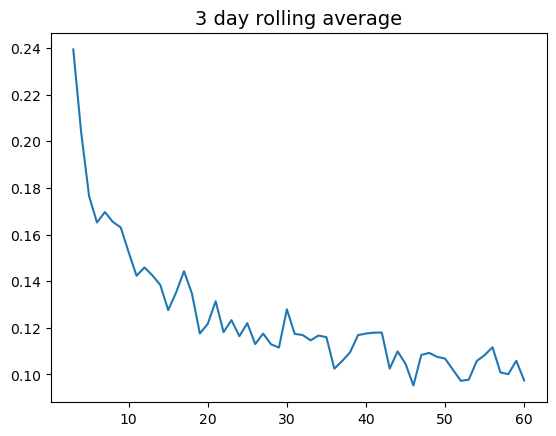

In [8]:
plt.plot(noclusters, silhouette_scores[0])
plt.title("3 day rolling average", fontsize=14)

plt.show()

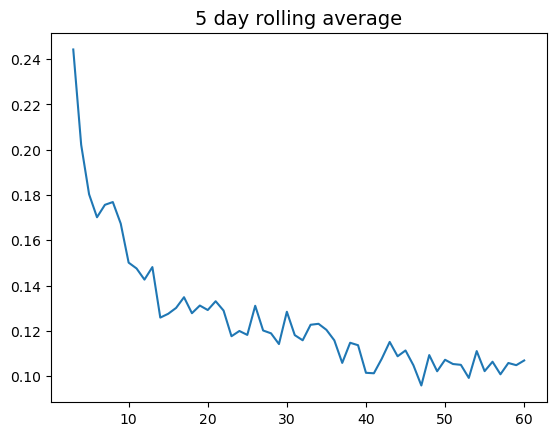

In [9]:
plt.plot(noclusters, silhouette_scores[1])
plt.title("5 day rolling average", fontsize=14)

plt.show()

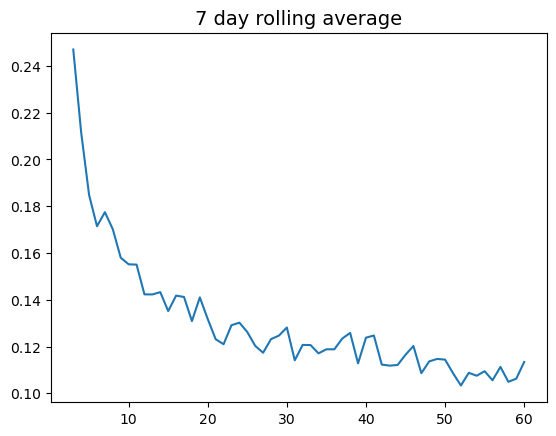

In [10]:
plt.plot(noclusters, silhouette_scores[2])
plt.title("7 day rolling average", fontsize=14)

plt.show()

In [12]:
labels

array([ 5,  3,  8,  6,  3,  5,  4, 13,  2,  0,  5,  7,  6,  0,  1, 14, 14,
        9,  1,  8,  5,  7,  8,  7,  5,  7, 10, 12, 10,  1, 13, 10, 10,  6,
       15, 13,  0,  9,  9,  3, 13,  7,  7,  1,  3,  7,  3,  0, 10,  8,  6,
        8, 15,  6,  9,  0,  1,  5,  5,  5,  3, 13,  1, 16,  8,  8,  6,  0,
        1, 15,  7,  9, 13,  3,  5,  4,  3,  3,  0,  1,  7, 15,  1, 10, 15,
        3, 15,  4,  0, 16,  0,  3,  1,  0,  0,  3,  5,  8,  6, 13,  5, 14,
        0,  6,  7,  6,  3, 13,  6,  3,  3,  1, 14,  8,  3, 10,  8,  3,  8,
        3, 14, 10, 13,  8,  0,  0,  9,  7,  1, 10, 15,  3,  0,  2,  8,  6,
        5,  7,  6, 15,  7,  6, 12,  9,  5,  8,  0,  0,  1, 10,  2, 10, 10,
        0,  1,  1, 10, 10,  0,  1,  7,  1,  3,  8,  9,  8,  6,  7,  0, 11,
       10, 13, 14,  0,  1, 15, 15, 15,  2,  2,  3, 10, 10,  8, 15, 15, 10,
        6,  0,  6,  7,  3,  6,  7, 14,  9, 10,  5,  3,  7,  2, 15,  9,  0,
        1,  1,  1,  1,  3,  6, 13, 12,  6,  7, 10,  1, 10,  6,  6,  0,  6,
       13,  6,  0,  9,  5

In [13]:
df

Date,2022-11-01 00:00:00-04:00,2022-11-02 00:00:00-04:00,2022-11-03 00:00:00-04:00,2022-11-04 00:00:00-04:00,2022-11-07 00:00:00-05:00,2022-11-08 00:00:00-05:00,2022-11-09 00:00:00-05:00,2022-11-10 00:00:00-05:00,2022-11-11 00:00:00-05:00,2022-11-14 00:00:00-05:00,...,2023-10-16 00:00:00-04:00,2023-10-17 00:00:00-04:00,2023-10-18 00:00:00-04:00,2023-10-19 00:00:00-04:00,2023-10-20 00:00:00-04:00,2023-10-23 00:00:00-04:00,2023-10-24 00:00:00-04:00,2023-10-25 00:00:00-04:00,2023-10-26 00:00:00-04:00,2023-10-27 00:00:00-04:00
MMM,0.071024,0.070465,0.070378,0.070723,0.071198,0.071006,0.071855,0.073305,0.074672,0.075065,...,0.053999,0.053942,0.053365,0.052562,0.052001,0.052614,0.053184,0.053796,0.053274,0.053300
AOS,0.051255,0.051127,0.051560,0.052569,0.053072,0.052780,0.053525,0.054791,0.056193,0.056542,...,0.068172,0.067601,0.066043,0.064396,0.063734,0.063616,0.063148,0.064017,0.064390,0.065760
ABT,0.059199,0.058702,0.058454,0.058746,0.059383,0.059661,0.060606,0.061495,0.062004,0.061787,...,0.056083,0.057039,0.057703,0.058649,0.058694,0.058566,0.057911,0.057545,0.057145,0.057029
ABBV,0.060523,0.060249,0.060023,0.060518,0.061086,0.061410,0.061634,0.061859,0.062429,0.062888,...,0.063908,0.064098,0.063852,0.063428,0.062773,0.062887,0.062747,0.062815,0.061754,0.061269
ACN,0.060085,0.058148,0.056691,0.056449,0.057320,0.057699,0.058986,0.060496,0.062108,0.062512,...,0.066694,0.066835,0.066660,0.065841,0.065197,0.064698,0.064383,0.064172,0.063731,0.063733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.056827,0.057028,0.057611,0.058436,0.058899,0.058942,0.059203,0.059355,0.059443,0.059312,...,0.058051,0.058724,0.059069,0.059152,0.058788,0.058681,0.058740,0.058738,0.058662,0.058590
ZBRA,0.058106,0.053818,0.053224,0.053250,0.053812,0.053530,0.054838,0.057042,0.058928,0.059555,...,0.048697,0.048865,0.048177,0.047529,0.047235,0.047229,0.046797,0.046761,0.046859,0.047692
ZBH,0.055457,0.054136,0.052972,0.052945,0.053080,0.053233,0.054128,0.055682,0.056938,0.057308,...,0.053038,0.053356,0.053315,0.052974,0.052802,0.052807,0.052652,0.052310,0.052033,0.051994
ZION,0.080533,0.078523,0.077550,0.077771,0.079134,0.079320,0.081635,0.084336,0.086246,0.085848,...,0.059017,0.059633,0.057608,0.053876,0.050772,0.049462,0.049281,0.049501,0.049275,0.049468
